# Demo
A demonstration notebook showing off how to use the `dmv.data.DataContainer` and the `dmv.layer.DynamicMultiViewRNN`.

In [15]:
import os
import datetime
import seaborn as sb
import numpy as np
import random
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [16]:
data_folder = Path(r'C:\Users\jeroe\data\MURA\MURA-v1.1')
multi = True
img_shape = [128, 128, 3]

## Augmentation

In [17]:
train_augmentation = {
    'rotation': 30,
    'horizontal_flip': True,
}

## Data

In [18]:
from dmv.data import DataContainer

train_dc = DataContainer(data_folder, train=True, multi=multi, batch_size=8, output_shape=img_shape, augmentation=train_augmentation)
valid_dc = DataContainer(data_folder, train=False, multi=multi, batch_size=8, output_shape=img_shape)

In [19]:
d = train_dc.df
d['img_count'] = d['file'].str.len()
d['img_count_group'] = d['img_count'].apply(lambda x: str(x) if x < 5 else '5+')
d = d[['location', 'img_count_group']]
d

,location,img_count_group
6705,Humerus,3
57,Elbow,2
9531,Shoulder,3
10854,Wrist,2
6740,Humerus,2
...,...,...
6055,Hand,3
9187,Shoulder,2
5321,Hand,2
9417,Shoulder,3


In [20]:
e = d.groupby(['location', 'img_count_group']).agg(count=('img_count_group', 'count')).reset_index()
e = e[e['location'].isin(['Humerus', 'Shoulder', 'Wrist'])]
e

,location,img_count_group,count
20,Humerus,1,22
21,Humerus,2,487
22,Humerus,3,62
23,Humerus,4,16
24,Humerus,5+,5
25,Shoulder,1,320
26,Shoulder,2,515
27,Shoulder,3,1004
28,Shoulder,4,904
29,Shoulder,5+,78


In [21]:
f = d.groupby(['img_count_group']).agg(count=('img_count_group', 'count')).reset_index()
f

,img_count_group,count
0,1,1131
1,2,3733
2,3,6466
3,4,1887
4,5+,240


In [22]:
sb.set()

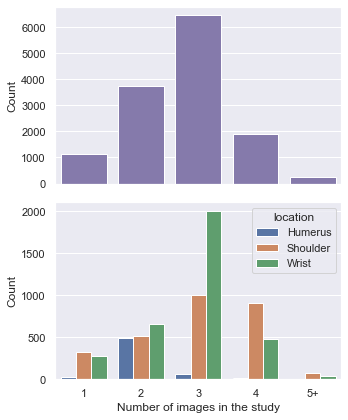

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

ax1=sb.barplot(data=f, x='img_count_group', y='count', color=sb.color_palette()[4], ax=ax1)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("Count")
sb.barplot(data=e, x='img_count_group', y='count', hue='location', ax=ax2)
plt.ylabel("Count")
plt.xlabel("Number of images in the study")
plt.tight_layout()
plt.savefig('tmp.png', dpi=300)